In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sentences = pd.read_csv('/users/nick/desktop/sentences.csv')
sentences.drop('Unnamed: 0', axis=1, inplace=True)

The data file contains one record for each separate term in prison. An individual person may have more than one record, but all will be assigned the same Abt_Inmate_ID value.

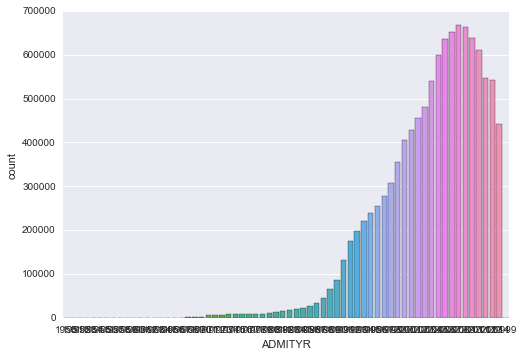

In [3]:
# First -- I want some sense of the number of sentences per year. 
sns.countplot(x='ADMITYR', data=sentences)

Although the decades long trend of increasing prison sentences is obvious, since this data collection effort began in 1991 I'm a little wary of the robustness of data that precedes 1991. So let's limit our view to 1991 and after.

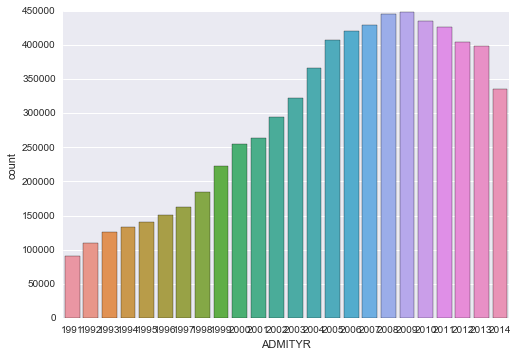

In [4]:
# Prison sentences peaked in 2008/2009, and then, for the first time (ever?!) began decreasing. But notice the sudden
# drop-off in 2014 ... 
sns.countplot(x='ADMITYR', data=sentences.loc[(sentences.admtype_ == 'New commitment') & (sentences.ADMITYR >= 1991) & (sentences.ADMITYR <= 2014)])

In [5]:
# Nine states didn't report in 2014; two states didn't report in 2013. For that reason, I will cap analysis at 2012.
# Also, surprising to discover that 7 states -- Idaho, Arkansas, Louisiana, Hawaii, Virginia, Connecticut & Vermont -- 
# don't report prison data. (We do have data for the District of Columbia.)

sentences.groupby('ADMITYR').state_.nunique().tail(25)

ADMITYR
1991    44
1992    44
1993    44
1994    44
1995    44
1996    44
1997    44
1998    44
1999    44
2000    44
2001    44
2002    44
2003    44
2004    44
2005    44
2006    44
2007    44
2008    44
2009    44
2010    44
2011    44
2012    44
2013    42
2014    35
9999    16
Name: state_, dtype: int64

In [6]:
# I'll focus analysis on 2008 - 2012: a five year span that captures the downturn in sentencing rates. I'll also
# limit data to "New commitments" -- NOT returns to prison for parole violations.
five = sentences.loc[(sentences.ADMITYR >= 2008) & (sentences.ADMITYR <= 2012) & (sentences.admtype_ == 'New commitment')].copy()

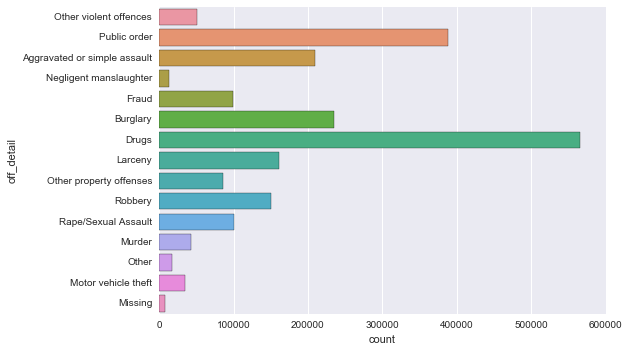

In [7]:
# What are the most common offenses?
sns.countplot(y="off_detail", data=five)

In [5]:
# What percentage of crimes are repeat offenses?
sentences.loc[sentences.admtype_ == 'New commitment'].loc[sentences.duplicated(subset=['ABT_INMATE_ID', 'off_general'])].off_general.value_counts() / sentences.loc[sentences.admtype_ == 'New commitment'].off_general.value_counts()

Drugs           0.247969
Missing         0.042481
Other           0.177314
Property        0.296371
Public order    0.202655
Violent         0.164464
Name: off_general, dtype: float64

In [6]:
sentences.loc[sentences.admtype_ == 'New commitment'].loc[sentences.duplicated(subset=['ABT_INMATE_ID', 'off_detail'])].off_detail.value_counts() / sentences.loc[sentences.admtype_ == 'New commitment'].off_detail.value_counts()

Aggravated or simple assault    0.164460
Burglary                        0.240789
Drugs                           0.247969
Fraud                           0.183940
Larceny                         0.241377
Missing                         0.042481
Motor vehicle theft             0.206967
Murder                          0.050150
Negligent manslaughter          0.071240
Other                           0.177314
Other property offenses         0.172058
Other violent offences          0.116489
Public order                    0.202655
Rape/Sexual Assault             0.116414
Robbery                         0.173751
Name: off_detail, dtype: float64

In [10]:
# I will additionally focus analysis on differences in sentencing between blacks and whites (to the 
# exclusion of hispanics and 'others.' In large part this is because the black inmate population and the white inmate 
# population are fairly well balanced.  
five.race_.value_counts()

White       835635
Black       702334
Hispanic    351860
Missing     229428
Other        40955
Name: race_, dtype: int64

In [11]:
# Most states have some quantity of missing data, but it is particularly glaring w/r/t Alabama's prison demographics.
# Research reveals that Alabama's 'Missing' population is a near perfect match with its known population 
# of black inmates.
five.groupby('state_').race_.value_counts().head(8)

state_  race_   
AK      Other        1138
        White         896
        Black         136
        Hispanic       35
        Missing        15
AL      Missing     26713
        White       25203
        Black          15
Name: race_, dtype: int64

In [12]:
five.reset_index(drop=True, inplace=True)

for i, e in enumerate(five.race_):
    if five.loc[i, 'state_'] == 'AL':
        if e == 'Missing':
            five.loc[i, 'race_'] = 'Black'

In [13]:
five.to_csv('/users/nick/desktop/five.csv')

In [155]:
# Recidivism rates, by race.
sentences.loc[(sentences.duplicated(subset='ABT_INMATE_ID')) & (sentences.admtype_ == 'New commitment')].race_.value_counts() / sentences.loc[sentences.admtype_ == 'New commitment'].race_.value_counts()

Black       0.389344
Hispanic    0.271159
Missing     0.256365
Other       0.324843
White       0.317950
Name: race_, dtype: float64

In [153]:
# Recidivism rates by state, 2008 - 2012.
sentences.loc[(sentences.duplicated(subset='ABT_INMATE_ID')) & (sentences.admtype_ == 'New commitment')].loc[(sentences.ADMITYR >= 2008) & (sentences.ADMITYR <= 2012)].state_.value_counts() / five.state_.value_counts() 

AK    0.672072
AL    0.257746
AZ    0.317810
CA    0.307524
CO    0.314253
DC    0.223977
DE    0.417073
FL    0.291170
GA    0.315292
IA    0.265967
IL    0.424346
IN    0.372579
KS    0.084309
KY    0.359838
MA    0.040114
MD    0.133250
ME    0.081050
MI    0.209851
MN    0.368416
MO    0.399315
MS    0.281620
MT    0.216981
NC    0.390027
ND    0.351710
NE    0.072280
NH    0.140078
NJ    0.301318
NM    0.224543
NV    0.181071
NY    0.296103
OH    0.020992
OK    0.275391
OR    0.121076
PA    0.356963
RI    0.533247
SC    0.335861
SD    0.290438
TN    0.384961
TX    0.301767
UT    0.316445
WA    0.322970
WI    0.261828
WV    0.296680
WY    0.173044
Name: state_, dtype: float64

In [156]:
# Recidivism rates, by state and race:
sentences.loc[(sentences.duplicated(subset='ABT_INMATE_ID')) & (sentences.admtype_ == 'New commitment') & ((sentences.race_ == 'Black') | (sentences.race_ == 'White'))].loc[(sentences.ADMITYR >= 2008) & (sentences.ADMITYR <= 2012)].groupby('state_').race_.value_counts() / race.groupby('state_').race_.value_counts()

state_  race_
AK      Black    0.713235
        White    0.632812
AL      Black    0.000150
        White    0.251835
AZ      Black    0.381384
        White    0.339886
CA      Black    0.367168
        White    0.345101
CO      Black    0.387525
        White    0.319701
DC      Black    0.231363
        White    0.095238
DE      Black    0.448304
        White    0.391995
FL      Black    0.352118
        White    0.260134
GA      Black    0.342956
        White    0.299388
IA      Black    0.276737
        White    0.275062
IL      Black    0.504307
        White    0.363008
IN      Black    0.415631
        White    0.367633
KS      Black    0.090382
        White    0.084388
KY      Black    0.400578
        White    0.368629
MA      Black    0.044057
        White    0.043783
                   ...   
NY      Black    0.340366
        White    0.258629
OH      Black    0.013490
        White    0.022939
OK      Black    0.311407
        White    0.277510
OR      Black    0.14853

In [17]:
# Crimes, filtered by the age-bracket that most frequently commits that crime.
five.groupby('off_detail').age_admit.value_counts() / five.groupby('off_detail').age_admit.count()

off_detail                    age_admit
Aggravated or simple assault  25-34        0.349530
                              18-24        0.288999
                              35-44        0.207362
                              45-54        0.124375
                              55+          0.029734
Burglary                      18-24        0.402933
                              25-34        0.302705
                              35-44        0.175602
                              45-54        0.102037
                              55+          0.016722
Drugs                         25-34        0.388889
                              35-44        0.239097
                              18-24        0.197192
                              45-54        0.141189
                              55+          0.033634
Fraud                         25-34        0.373981
                              35-44        0.283654
                              45-54        0.154796
                        

In [18]:
# Yikes! White inmates more often given conditional release than black inmates.
race = five.loc[(five.race_ == 'Black') | (five.race_ == 'White')].copy()
race.groupby('reltype_').race_.value_counts() / race.groupby('reltype_').race_.count()

reltype_               race_
Conditional release    White    0.567882
                       Black    0.432118
Missing                Black    0.519185
                       White    0.480815
Other                  White    0.569368
                       Black    0.430632
Unconditional release  White    0.505949
                       Black    0.494051
Name: race_, dtype: float64

In [19]:
# Differences in sentencing, by race.
race.groupby(['off_detail', 'race_']).proj_time_served.mean()

off_detail                    race_
Aggravated or simple assault  Black     3.284607
                              White     2.544235
Burglary                      Black     2.442252
                              White     2.107839
Drugs                         Black     1.759991
                              White     1.494460
Fraud                         Black     1.145066
                              White     1.241234
Larceny                       Black     1.084159
                              White     1.256241
Missing                       Black     0.933210
                              White     0.823065
Motor vehicle theft           Black     1.242500
                              White     1.260664
Murder                        Black    24.542097
                              White    22.511936
Negligent manslaughter        Black     8.018338
                              White     6.185562
Other                         Black     2.190259
                              Whi

In [113]:
# Most commonly sentenced crime, by state?
most_common = pd.DataFrame(five.groupby('state_').off_general.value_counts() / five.groupby('state_').off_general.count())

most_common.rename(columns={'off_general':'percentage'}, inplace=True)
most_common.reset_index(level='off_general', inplace=True)
most_common.index.name=None

In [114]:
for i, e in enumerate(most_common.percentage):
    if i == 0:
        pass
    if most_common.index[i] == most_common.index[i-1]:
        most_common.iloc[i,1] = np.nan
        
most_common = most_common.loc[most_common.percentage.notnull()]
most_common

,off_general,percentage
AK,Public order,0.980180
AL,Drugs,0.366583
AZ,Drugs,0.278794
CA,Violent,0.359724
CO,Violent,0.317618
DC,Drugs,0.368881
DE,Public order,0.694801
FL,Property,0.322043
GA,Property,0.332933
IA,Property,0.310307


In [24]:
# Are blacks more likely to be prosecuted at a young age?
race.groupby('age_admit').race_.value_counts() / race.groupby('age_admit').race_.count()

age_admit  race_
18-24      Black    0.554200
           White    0.445800
25-34      White    0.549876
           Black    0.450124
35-44      White    0.581561
           Black    0.418439
45-54      White    0.562500
           Black    0.437500
55+        White    0.594159
           Black    0.405841
Name: race_, dtype: float64

In [25]:
# Ratio, by race, of parole sentences to new commitment sentences.
parole = sentences.loc[(sentences.ADMITYR >= 2008) & (sentences.ADMITYR <= 2012) & (sentences.admtype_ == 'Parole return/revocation')].copy()
parole.loc[(parole.race_ == 'White') | (parole.race_ == 'Hispanic') | (parole.race_ == 'Black')].race_.value_counts() / five.loc[(five.race_ == 'White') | (five.race_ == 'Hispanic') | (five.race_ == 'Black')].race_.value_counts() 

White       0.359448
Black       0.393079
Hispanic    0.489590
Name: race_, dtype: float64

## Incarceration Trends

In [44]:
blackandwhite = sentences.loc[(sentences.ADMITYR >= 1991) & (sentences.ADMITYR <= 2012) & (sentences.admtype_ == 'New commitment') & ((sentences.race_ == 'Black') | (sentences.race_ == 'White'))]

In [45]:
black = pd.DataFrame(blackandwhite.loc[rates.race_ == 'Black'].groupby('ADMITYR').race_.value_counts())
white = pd.DataFrame(blackandwhite.loc[rates.race_ == 'White'].groupby('ADMITYR').race_.value_counts())

In [46]:
black.rename(columns={'race_': 'Black Incarcerated'}, inplace=True)
black.reset_index(level='race_', drop=True, inplace=True)
black.index.name = None

white.rename(columns={'race_': 'White Incarcerated'}, inplace=True)
white.reset_index(level='race_', drop=True, inplace=True)
white.index.name = None

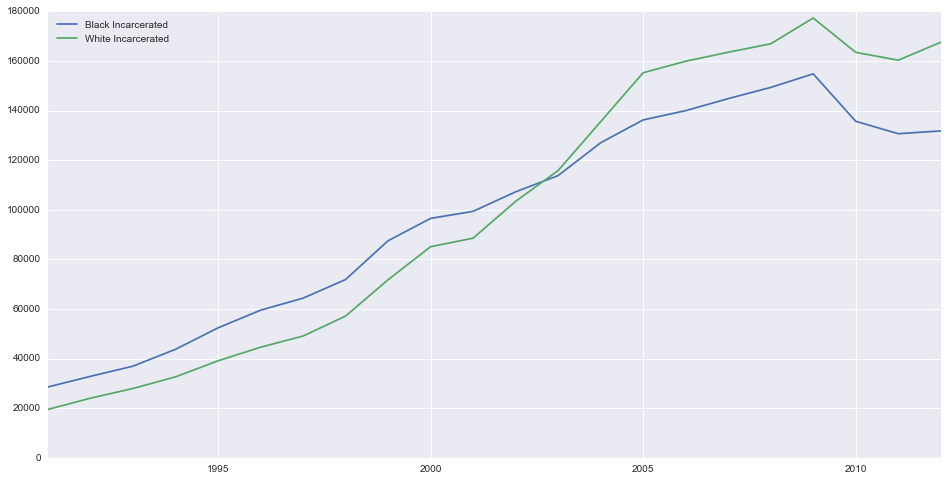

In [47]:
# News to me. About a decade ago, incarceration of whites began outpacing incarceration of blacks.
rates = pd.concat([black, white], axis=1)
rates.plot.line(figsize=(16, 8))

## Per Capita Analysis & Compiling State Trends

In [26]:
# I want to calculate sentences per capita. So let's go to the government for census data.
pop2008 = pd.read_csv('https://www.census.gov/popest/data/state/totals/2008/tables/NST-EST2008-01.csv')
pop2012 = pd.read_csv('https://www.census.gov/popest/data/state/totals/2012/tables/NST-EST2012-01.csv')

In [27]:
# Cleaning census data.
pop_map = {  '.Alabama': 'AL',
             '.Alaska': 'AK',
             '.Arizona': 'AZ',
             '.Arkansas': 'AR', 
             '.California': 'CA', 
             '.Colorado': 'CO',
             '.Connecticut': 'CN',
             '.Delaware': 'DE',
             '.District of Columbia': 'DC',
             '.Florida': 'FL',
             '.Georgia': 'GA',
             '.Hawaii': 'HI',
             '.Idaho': 'ID',
             '.Illinois': 'IL', 
             '.Indiana': 'IN',
             '.Iowa': 'IA',
             '.Kansas': 'KS',
             '.Kentucky': 'KY',
             '.Louisiana': 'LA',
             '.Maine': 'ME',
             '.Maryland': 'MD',
             '.Massachusetts': 'MA',
             '.Michigan': 'MI',
             '.Minnesota': 'MN',
             '.Mississippi': 'MS',
             '.Missouri': 'MO',
             '.Montana': 'MT',
             '.Nebraska': 'NE',
             '.Nevada': 'NV',
             '.New Hampshire': 'NH',
             '.New Jersey': 'NJ',
             '.New Mexico': 'NM',
             '.New York': 'NY',
             '.North Carolina': 'NC',
             '.North Dakota': 'ND',
             '.Ohio': 'OH',
             '.Oklahoma': 'OK',
             '.Oregon': 'OR',
             '.Pennsylvania': 'PA',
             '.Rhode Island': 'RI',
             '.South Carolina': 'SC',
             '.South Dakota': 'SD',
             '.Tennessee': 'TN',
             '.Texas': 'TX',
             '.Utah': 'UT',
             '.Vermont': 'VT',
             '.Virginia': 'VA',
             '.Washington': 'WA',
             '.West Virginia': 'WV',
             '.Wisconsin': 'WI',
             '.Wyoming': 'WY' }

pop2008.iloc[:,0] = pop2008.iloc[:,0].map(pop_map)
pop2012.iloc[:,0] = pop2012.iloc[:,0].map(pop_map)

In [28]:
# Still cleaning.
pop2008 = pop2008.iloc[8:59,[0,1]]
pop2012 = pop2012.iloc[8:59,[0,5]]

pop2008.rename(columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)':'state_', 'Unnamed: 1':'pop_08'}, inplace=True)
pop2012.rename(columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)':'state_', 'Unnamed: 5':'pop_12'}, inplace=True)

pop2008.reset_index(drop=True, inplace=True)
pop2012.reset_index(drop=True, inplace=True)

pop = pop2008.merge(pop2012, on='state_')
pop.iloc[:,1:] = pop.iloc[:,1:].applymap(lambda x: int(x.replace(',','')))

pop.set_index('state_', inplace=True)
pop.index.name=None

In [29]:
pop['sents_08'] = five.loc[five.ADMITYR == 2008].state_.value_counts()
pop['sents_12'] = five.loc[five.ADMITYR == 2012].state_.value_counts()
# Sentences per 100,000 state residents, 2008.
pop['sents_per_100000_08'] = (pop.sents_08 / pop.pop_08) * 100000
# Sentences per 100,000 state residents, 2012.
pop['sents_per_100000_12'] = (pop.sents_12 / pop.pop_12) * 100000
# Change in per capita sentencing rate, 2008 to 2012.
pop['change_sent_rate'] = ((pop.sents_per_100000_12 - pop.sents_per_100000_08) / pop.sents_per_100000_08) * 100

In [157]:
states = pop.merge(most_common, left_index=True, right_index=True)
states['recidivism'] = sentences.loc[(sentences.duplicated(subset='ABT_INMATE_ID')) & (sentences.admtype_ == 'New commitment')].loc[(sentences.ADMITYR >= 2008) & (sentences.ADMITYR <= 2012)].state_.value_counts() / five.state_.value_counts() 
states[['percentage', 'recidivism']] = states[['percentage', 'recidivism']].applymap(lambda x: 100 * x)
states.rename(columns={'percentage': 'most_common_percentage'}, inplace=True)

In [158]:
states.index.name = 'State'
states.reset_index(inplace=True)
states = states.iloc[1:,:]
states.reset_index(drop=True, inplace=True)

In [53]:
states

,State,pop_08,pop_12,sents_08,sents_12,sents_per_100000_08,sents_per_100000_12,change_sent_rate,off_general,most_common_percentage,recidivism
0,AL,4661900,4822023,10721.0,9824.0,229.970613,203.731919,-11.409585,Drugs,36.658258,25.774586
1,AZ,6500180,6553255,18396.0,14526.0,283.007547,221.660839,-21.676704,Drugs,27.879378,31.780987
2,CA,36756666,38041430,45874.0,27017.0,124.804573,71.019938,-43.095083,Violent,35.972412,30.752414
3,CO,4939456,5187582,6253.0,5060.0,126.592888,97.540627,-22.949363,Violent,31.761769,31.425263
4,DC,591833,632323,1608.0,1661.0,271.698266,262.682205,-3.318410,Drugs,36.888133,22.397668
5,DE,873092,917092,1083.0,3489.0,124.041911,380.441657,206.704125,Public order,69.480118,41.707300
6,FL,18328340,19317568,39526.0,30487.0,215.655100,157.820073,-26.818298,Property,32.204281,29.116959
7,GA,9685744,9919945,16495.0,18057.0,170.301837,182.027219,6.885059,Property,33.293341,31.529250
8,IA,3002555,3074186,2443.0,3064.0,81.364038,99.668660,22.497190,Property,31.030686,26.596682
9,IL,12901563,12875255,22703.0,19991.0,175.970927,155.266828,-11.765636,Drugs,29.559687,42.434612


In [159]:
states.to_csv('/users/nick/desktop/states.csv')